In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# The Game of Frogger

## The game of Frogger is a simple game where a frog starts at one side of a stream and tries to get to the other side of the stream. The stream has within it N lily pads. The frog starts, effectively, on pad 0 and can jump to pad 1, 2, 3, ..., N+1. The frog is equally likely to jump to any of the pads 1, 2, 3, ..., N+1.  The frog gets to the other side when she reaches pad N+1.

## The question is, on average, how many jumps does it take for the frog to get to the other side of the stream?


## Analytic Solution

### The expectation value for a discrete random variable is defined as:

### $E = \sum_{i=0}^{n} x_i p_i$

### where $x_i$ is the value of the random variable and $p_i$ is the probability of the random variable taking on the value $x_i$.

### Let's consider some simple cases:

### n = 0

### $E_0 = x_0 p_0 = 1 \cdot 1 = 1$

### n = 1

### $E_1 = \frac{1}{2} (1) + \frac{1}{2} (2) = 1 + \frac{1}{2} (1) = \frac{3}{2}$ = 1.5

### n = 2

### $E_2 = \frac{1}{3} (1) + \frac{1}{3} (\frac{1}{2} (2) + \frac{1}{2} (3)) + \frac{1}{3} (2)  = 1 + \frac{1}{3} (\frac{3}{2}) + \frac{1}{3} (1) = \frac{11}{6} = 1.8333$

### We can observe a pattern now ... for each value of $n$, we can break down the problem into a sum of the previous problems (for smaller n values).  We see that for any value of n, the expectation value is:

### $E_n = 1 + \frac{1}{n+1} \sum_{i=1}^{n} E_{n-i}$

### So, we can calculate the expectation value for any value of n by calculating the expectation value for all smaller values of n.  A recursive solution to this problem seems appropriate.

## Harmonic Mean

### The harmonic mean is defined as:

### $H = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}$

### where $x_i$ is the value of the random variable and $n$ is the number of values of $x_i$.

### The harmonic mean is the appropriate mean to use when the values of the random variable are rates (e.g. miles per gallon).  In this case, the values of the random variable are the number of jumps it takes for the frog to get to the other side of the stream.  So, the harmonic mean is the appropriate mean to use.



### Set the number of lilypads

In [2]:
n = 100

### seed the random number generator

In [3]:
random.seed(1)

In [4]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value

In [5]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval.append(1)
    else:
        sum = 1.0
        for i in range(0,npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum = sum + 1.0/(npad+1)*(eval[npad-i-1])
        eval.append(sum)
    #print("Theory: ",npad,eval[npad])
  

In [6]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between 1 and the number of lilypads left to jump
            jump = int(random.uniform(1,(end-current_paddle+1)))
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
  

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.500900
Expectation value for n = 2 is 1.836400
Expectation value for n = 3 is 2.077400
Expectation value for n = 4 is 2.286100
Expectation value for n = 5 is 2.457800
Expectation value for n = 6 is 2.580900
Expectation value for n = 7 is 2.719300
Expectation value for n = 8 is 2.827100
Expectation value for n = 9 is 2.937900
Expectation value for n = 10 is 3.026300
Expectation value for n = 11 is 3.112800
Expectation value for n = 12 is 3.172100
Expectation value for n = 13 is 3.246400
Expectation value for n = 14 is 3.298400
Expectation value for n = 15 is 3.391100
Expectation value for n = 16 is 3.469200
Expectation value for n = 17 is 3.512800
Expectation value for n = 18 is 3.529600
Expectation value for n = 19 is 3.583100
Expectation value for n = 20 is 3.642400
Expectation value for n = 21 is 3.695700
Expectation value for n = 22 is 3.720600
Expectation value for n = 23 is 3.770700
Expectation value for n = 

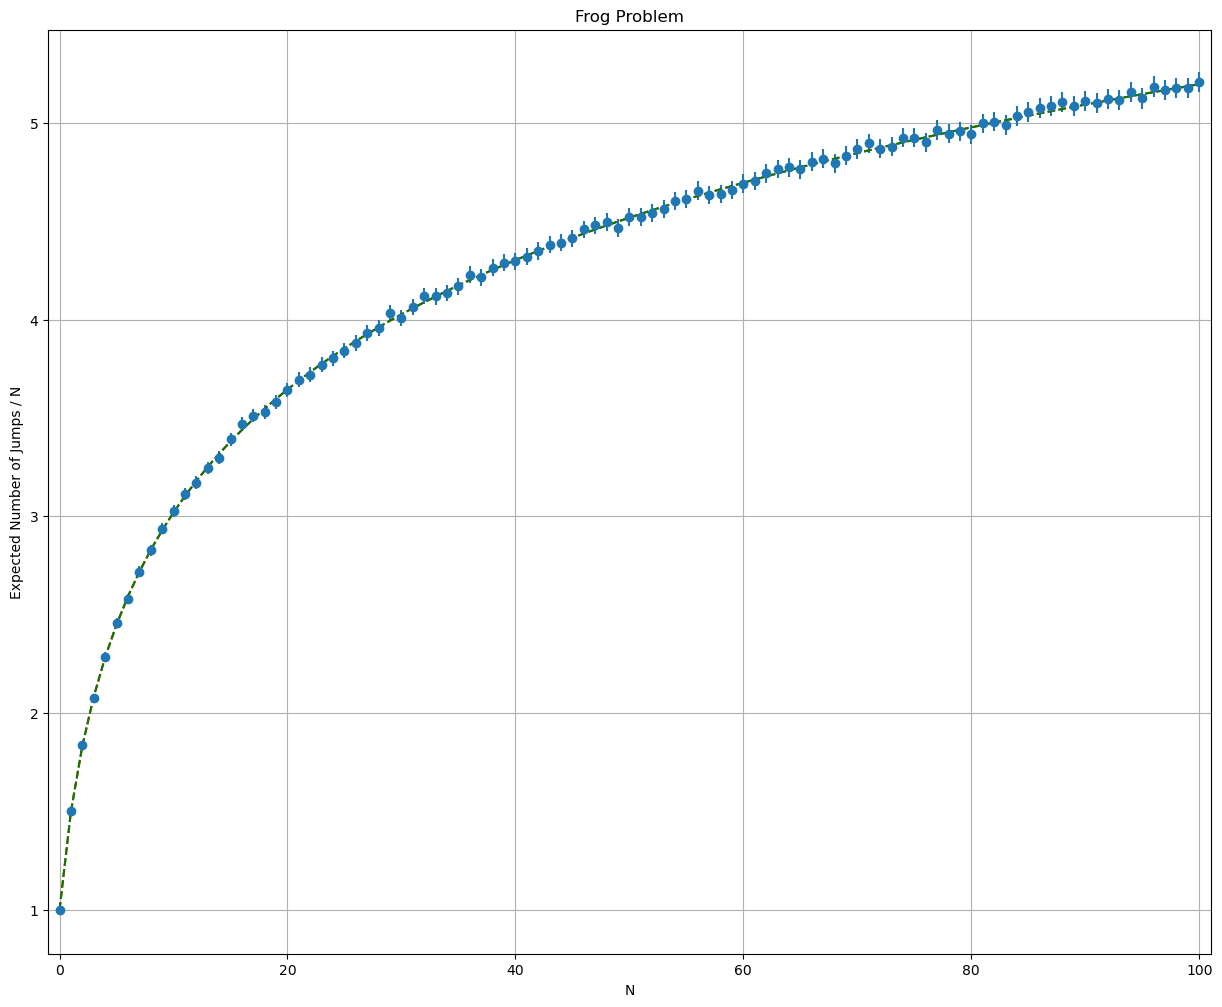

In [7]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,eval,'r--')
ax1.plot(x,eval_harmonic,'g--')


In [8]:
n = 100

start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x2 = [] # array for the number of lilypads for plotting
y2 = [] # array for the expectation value for plotting
eval2 = [] # array for the analytic solution
eval_harmonic2 = [] # array for the analytic solution
x_harmonic2 = [] # array for the harmonic mean
sigma2 = [] # array for the error on the expectation value

In [9]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval2.append(1)
    else:
        sum = 1.0
        for i in range(0,npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum = sum + 1.0/(npad+1)*(eval2[npad-i-1])
        eval2.append(sum)
    #print("Theory: ",npad,eval[npad])

In [10]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic2.append(npad+1)
    x2.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic2)
    eval_harmonic2.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between 1 and the number of lilypads left to jump
            jump = int(random.uniform(-current_paddle,(end-current_paddle+1)))
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y2.append(expectation_value)
    sigma2.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
  

Expectation value for n = 0 is 2.008200
Expectation value for n = 1 is 3.010300
Expectation value for n = 2 is 4.052200
Expectation value for n = 3 is 4.998200
Expectation value for n = 4 is 6.012200
Expectation value for n = 5 is 7.125200
Expectation value for n = 6 is 8.046000
Expectation value for n = 7 is 9.089100
Expectation value for n = 8 is 10.025500
Expectation value for n = 9 is 11.162000
Expectation value for n = 10 is 11.912700
Expectation value for n = 11 is 13.089000
Expectation value for n = 12 is 13.910900
Expectation value for n = 13 is 14.862100
Expectation value for n = 14 is 15.903700
Expectation value for n = 15 is 17.184600
Expectation value for n = 16 is 18.208500
Expectation value for n = 17 is 19.467500
Expectation value for n = 18 is 19.782900
Expectation value for n = 19 is 20.941100
Expectation value for n = 20 is 22.175500
Expectation value for n = 21 is 22.963700
Expectation value for n = 22 is 24.093400
Expectation value for n = 23 is 24.989400
Expectatio

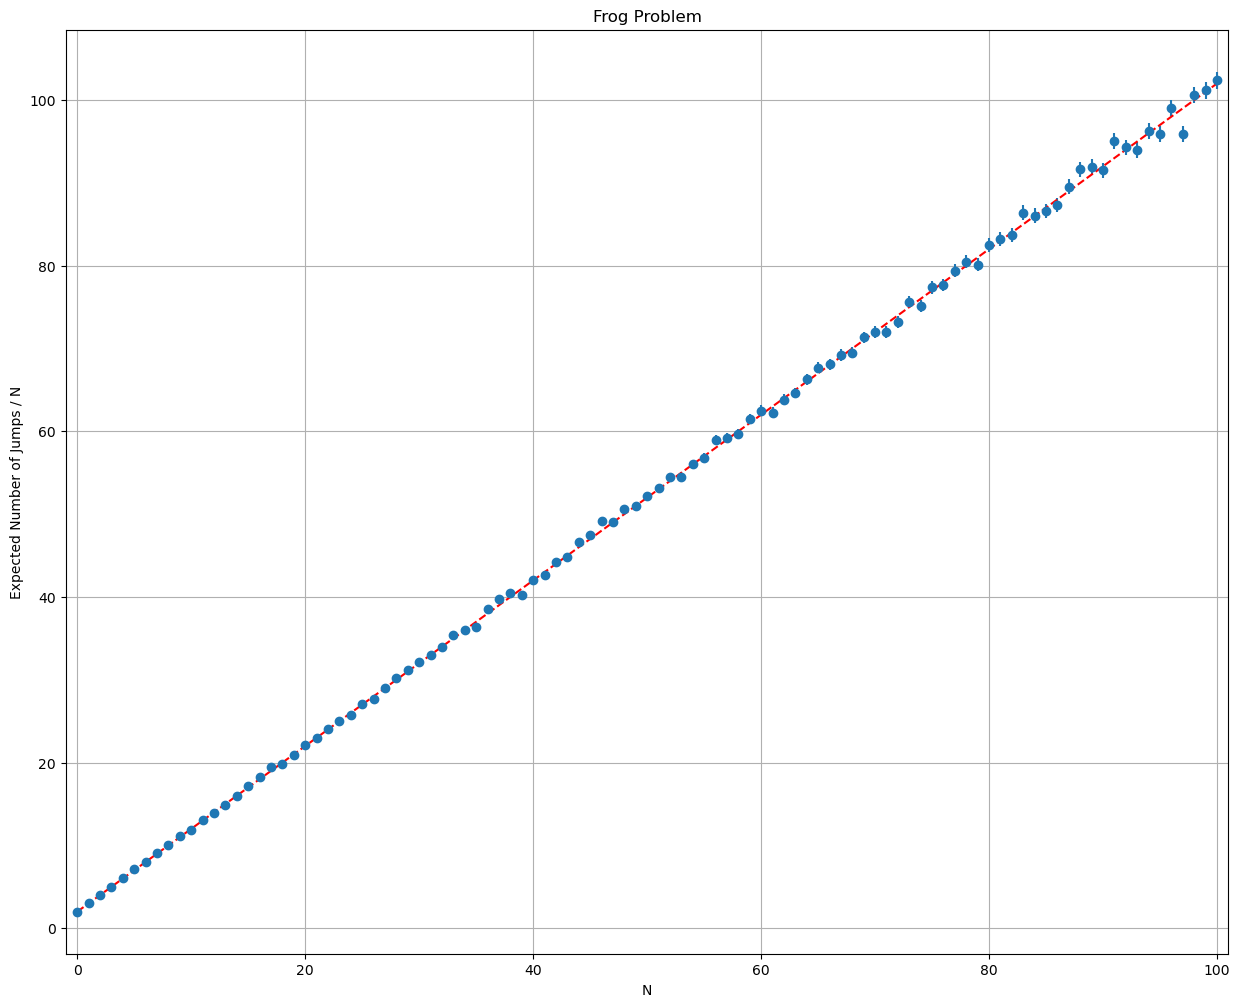

In [11]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x2,y2,yerr=sigma2,fmt='o')
x_theory = [x2[i]+2 for i in range(len(x2))]
ax1.plot(x2,x_theory,'r--')
#ax1.plot(x2,eval2,'r--')
#ax1.plot(x2,eval_harmonic2,'g--')

In [12]:
n = 100

start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 1000 # number of simulations to run

x3 = [] # array for the number of lilypads for plotting
y3 = [] # array for the expectation value for plotting
eval3 = [] # array for the analytic solution
eval_harmonic3 = [] # array for the analytic solution
x_harmonic3 = [] # array for the harmonic mean
sigma3 = [] # array for the error on the expectation value
eval33 =[]

In [13]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval3.append(1)
    else:
        sum = 1.0
        for i in range(0,npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum = sum + 1.0/(npad+1)*(eval3[npad-i-1])
        eval3.append(sum)
    print("Theory: ",npad,eval[npad])
    
def prob_sum(npad):
    sumsum = 0.0
    for i in range(1,npad+2):
        sumsum = sumsum + 1.0/i
    return sumsum

for npad in range(0,n+1):
    #print("npad = ",npad)
    if (npad == 0):
        eval33.append(1)
    else:
        sum = 1.0/((npad+1)*prob_sum(npad))
        #print("sum = ",sum)
        
        for i in range(0,npad):
            #print(i, npad, npad-i-1, 1.0/prob_sum(npad), 1.0/(npad-i), eval33[i]+1)
            #print(eval33[npad-i-1])
            sum = sum + 1.0/prob_sum(npad)*1.0/(npad-i)*(eval33[i]+1)
            #print("sum = ",sum)
            
        #print("sum = ",sum)
        eval33.append(sum)
        
    print("Theory2: ",npad,eval33[npad])


Theory:  0 1
Theory:  1 1.5
Theory:  2 1.8333333333333333
Theory:  3 2.083333333333333
Theory:  4 2.283333333333333
Theory:  5 2.4499999999999997
Theory:  6 2.5928571428571425
Theory:  7 2.7178571428571425
Theory:  8 2.8289682539682532
Theory:  9 2.9289682539682547
Theory:  10 3.019877344877344
Theory:  11 3.103210678210678
Theory:  12 3.1801337551337547
Theory:  13 3.2515623265623264
Theory:  14 3.318228993228993
Theory:  15 3.3807289932289937
Theory:  16 3.4395525226407573
Theory:  17 3.4951080781963135
Theory:  18 3.5477396571436817
Theory:  19 3.5977396571436824
Theory:  20 3.6453587047627285
Theory:  21 3.690813250217276
Theory:  22 3.7342915110868398
Theory:  23 3.7759581777535063
Theory:  24 3.815958177753507
Theory:  25 3.854419716215045
Theory:  26 3.8914567532520814
Theory:  27 3.927171038966368
Theory:  28 3.961653797587057
Theory:  29 3.9949871309203893
Theory:  30 4.02724519543652
Theory:  31 4.058495195436519
Theory:  32 4.08879822573955
Theory:  33 4.118209990445434
Theo

In [14]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    #print("Considering npad = ",npad)
    
    x_harmonic3.append(npad+1)
    x3.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic3)
    eval_harmonic3.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between 1 and the number of lilypads left to jump
            prob = [1.0/i for i in range(1,end-current_paddle+1)]
            prob_normalized = [i/np.sum(prob) for i in prob]
            #print(prob_normalized)
            jump = int(np.random.choice(np.arange(1,end-current_paddle+1),p=prob_normalized))
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y3.append(expectation_value)
    sigma3.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
  

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.693000
Expectation value for n = 2 is 2.161000
Expectation value for n = 3 is 2.596000
Expectation value for n = 4 is 2.983000
Expectation value for n = 5 is 3.244000
Expectation value for n = 6 is 3.523000
Expectation value for n = 7 is 3.856000
Expectation value for n = 8 is 4.111000
Expectation value for n = 9 is 4.336000
Expectation value for n = 10 is 4.577000
Expectation value for n = 11 is 4.754000
Expectation value for n = 12 is 4.960000
Expectation value for n = 13 is 5.207000
Expectation value for n = 14 is 5.251000
Expectation value for n = 15 is 5.354000
Expectation value for n = 16 is 5.404000
Expectation value for n = 17 is 5.722000
Expectation value for n = 18 is 5.791000
Expectation value for n = 19 is 5.962000
Expectation value for n = 20 is 6.165000
Expectation value for n = 21 is 6.120000
Expectation value for n = 22 is 6.362000
Expectation value for n = 23 is 6.360000
Expectation value for n = 

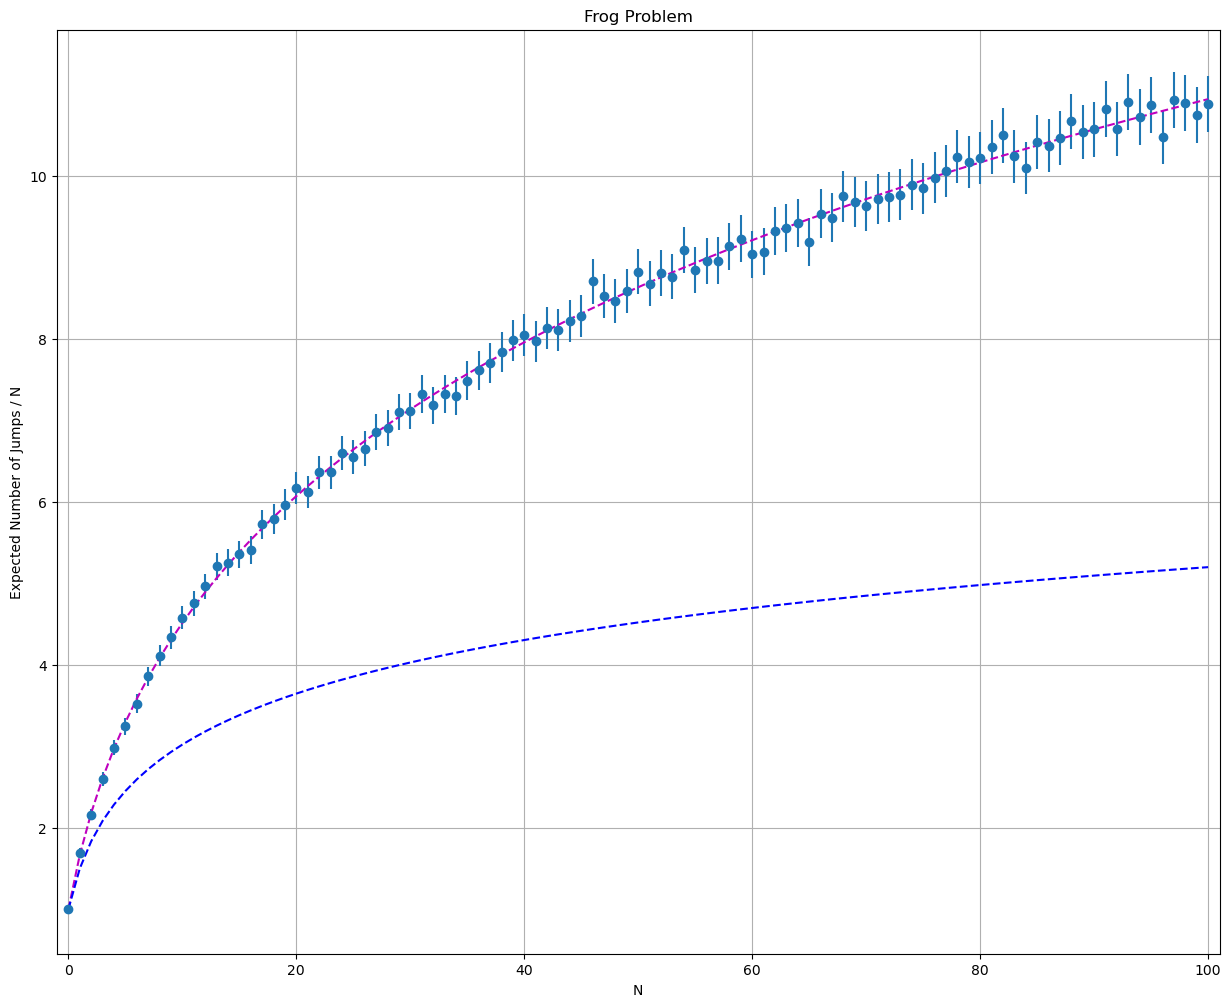

In [15]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x3,y3,yerr=sigma3,fmt='o')

#y3_theory = [(np.log(x3[i]+1)+1) for i in range(len(y3))]
#ax1.plot(x3,y3_theory,'r--')

#y3_theory_2 = [1.2*np.sqrt((x3[i]+1)) for i in range(len(y3))]
#ax1.plot(x3,y3_theory_2,'g--')

#y3_theory_3 = [eval_harmonic3[i]+y3_theory[i] for i in range(len(y3))]
#ax1.plot(x3,y3_theory_3,'y--')

ax1.plot(x3,eval33,'m--')

ax1.plot(x3,eval_harmonic3,'b--')

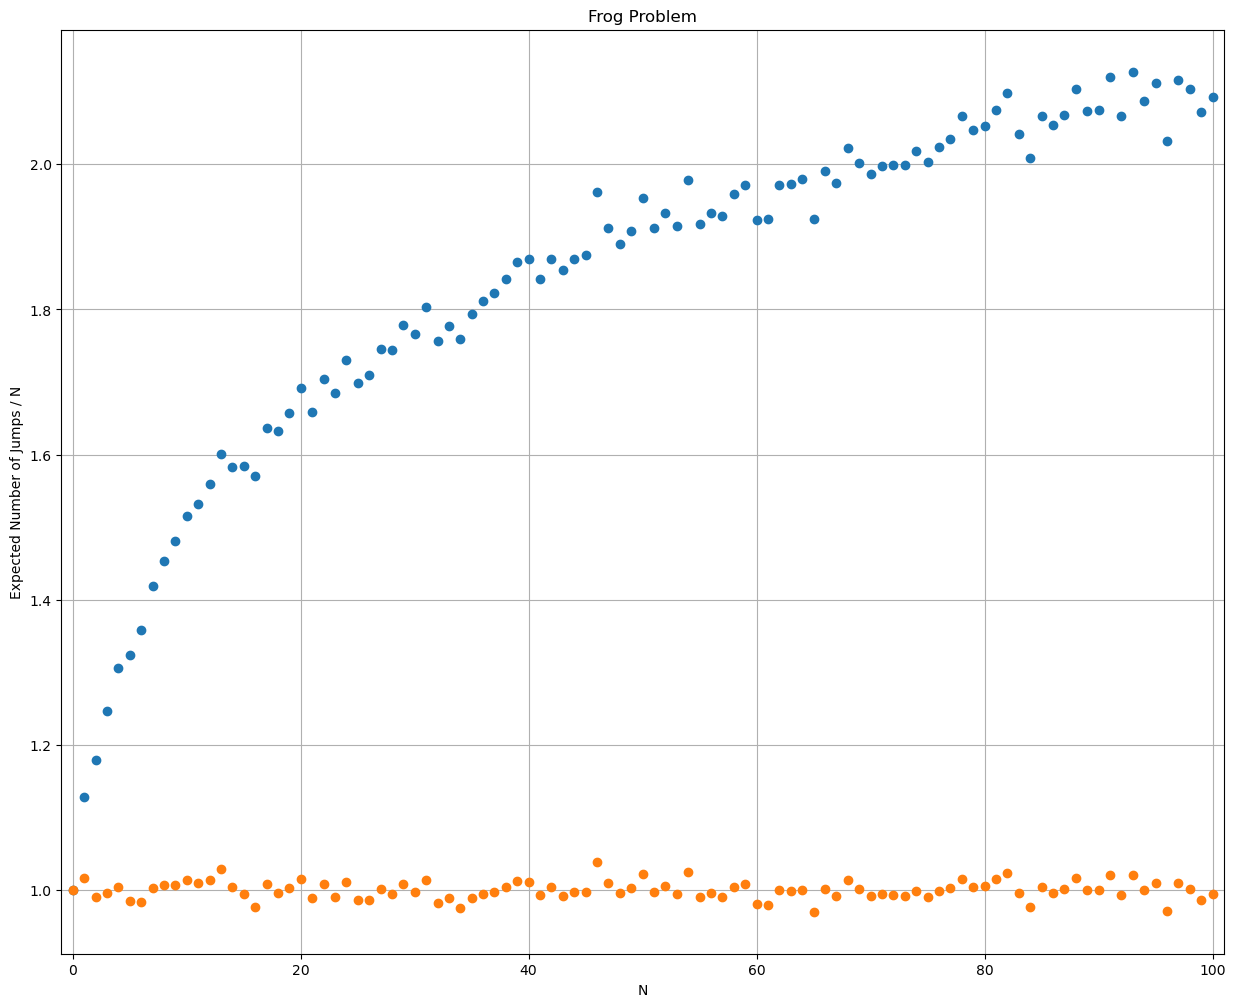

In [16]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

guess = [y3[i]/eval3[i] for i in range(len(y3))]
guess2 = [y3[i]/eval33[i] for i in range(len(y3))]

ax1.plot(x3,guess,'o')
ax1.plot(x3,guess2,'o')
